In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#np_random = np.random.default_rng(20211124)
np_random = np.random.RandomState(20211124) # Legacy random state generator.
# It is now recommended to use np.random.default_rn instead, 
# but we stick with RandomState to maintain compability with networkx.spring_layout


In [2]:
def random_connected_graph(nodes: int, edges: int, max_weight: int = 20):
    """
    Creates a random connected graph with a given number of nodes and edges,
    and random integer weights for the edges uniformely drawn 
    from the interval [1:max_weight] (both included).
    The path 0 -> 1 -> 2 -> ... -> nodes-1 -> nodes is generated first,
    so the graph is guaranteed to be fully connected.
    """
    assert nodes-1  <= edges <= (nodes*(nodes-1))/2
    weights = np_random.randint(1, max_weight+1, size=edges)
    graph = nx.Graph()
    graph.add_weighted_edges_from([(i, i+1, w) for i, w in enumerate(weights[:nodes-1])])
    while graph.number_of_edges() < edges:
        i, j = np_random.randint((nodes, nodes))
        if (i != j) and not graph.has_edge(i, j):
            graph.add_edge(i, j, weight=weights[graph.number_of_edges()])
    return graph    

G = random_connected_graph(6, 10)

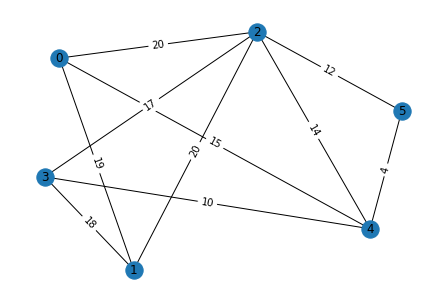

In [3]:
pos = nx.spring_layout(G, k=20, scale=-1, seed=np_random)
nx.draw(G, pos, with_labels=True)
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()